# Konsep Backpropagation

## Daftar Isi
1. Pengenalan Backpropagation
2. Chain Rule dan Gradien Descent
3. Forward Pass
4. Backward Pass
5. Implementasi
6. Visualisasi
7. Latihan

## 1. Pengenalan Backpropagation

Backpropagation (propagasi balik) adalah algoritma yang digunakan untuk melatih neural network dengan cara:
1. Menghitung error di output layer
2. Mempropagasi error tersebut ke layer-layer sebelumnya
3. Mengupdate weights dan biases untuk meminimalkan error

Mari kita mulai dengan mengimport library yang diperlukan:

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Set random seed untuk reproducibility
np.random.seed(42)

## 2. Chain Rule dan Gradien Descent

Backpropagation menggunakan chain rule dari kalkulus untuk menghitung gradien loss function terhadap setiap weight dalam network.

### Chain Rule
Jika y = f(u) dan u = g(x), maka:
\[ \frac{dy}{dx} = \frac{dy}{du} \cdot \frac{du}{dx} \]

### Gradien Descent
Update rule untuk weights:
\[ w_{new} = w_{old} - \eta \frac{\partial E}{\partial w} \]

dimana:
- η (eta) adalah learning rate
- E adalah error/loss function
- ∂E/∂w adalah gradien error terhadap weight

Mari kita visualisasikan konsep gradien descent:

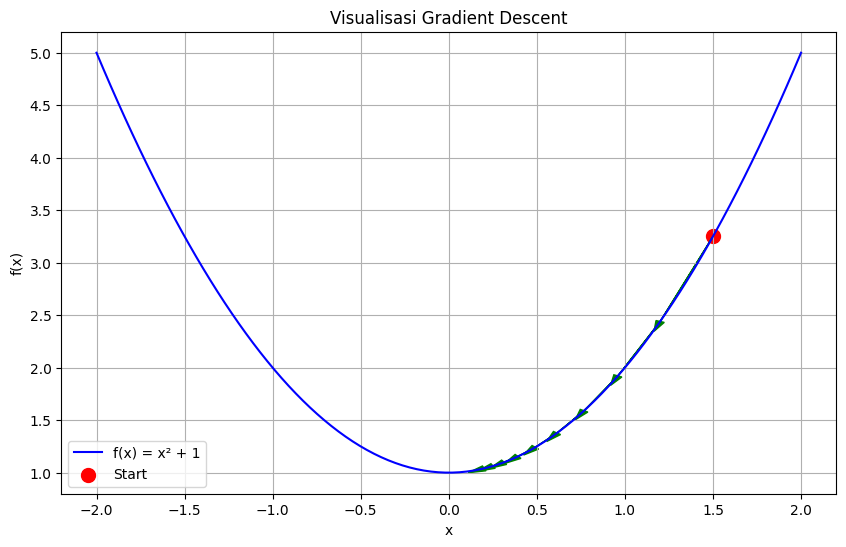

In [58]:
def plot_gradient_descent():
    # Create a simple quadratic function
    x = np.linspace(-2, 2, 100)
    y = x**2 + 1
    
    # Starting point
    x_start = 1.5
    y_start = x_start**2 + 1
    
    # Gradient descent steps
    learning_rate = 0.1
    steps = []
    x_current = x_start
    
    for _ in range(10):
        # Calculate gradient
        gradient = 2 * x_current
        
        # Update x
        x_new = x_current - learning_rate * gradient
        y_new = x_new**2 + 1
        
        # Store step
        steps.append((x_current, x_current**2 + 1))
        x_current = x_new
    
    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(x, y, 'b-', label='f(x) = x² + 1')
    plt.scatter(x_start, y_start, c='r', s=100, label='Start')
    
    # Plot steps
    for i in range(len(steps)-1):
        x1, y1 = steps[i]
        x2, y2 = steps[i+1]
        plt.arrow(x1, y1, x2-x1, y2-y1, head_width=0.05, head_length=0.1, fc='g', ec='g')
    
    plt.grid(True)
    plt.legend()
    plt.title('Visualisasi Gradient Descent')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.show()

plot_gradient_descent()

## 3. Forward Pass

Forward pass adalah proses menghitung output network dari input yang diberikan. Langkah-langkahnya:

1. Input layer menerima data
2. Setiap neuron menghitung weighted sum
3. Aplikasikan fungsi aktivasi
4. Teruskan hasil ke layer berikutnya

Mari kita implementasikan neural network sederhana dengan satu hidden layer:

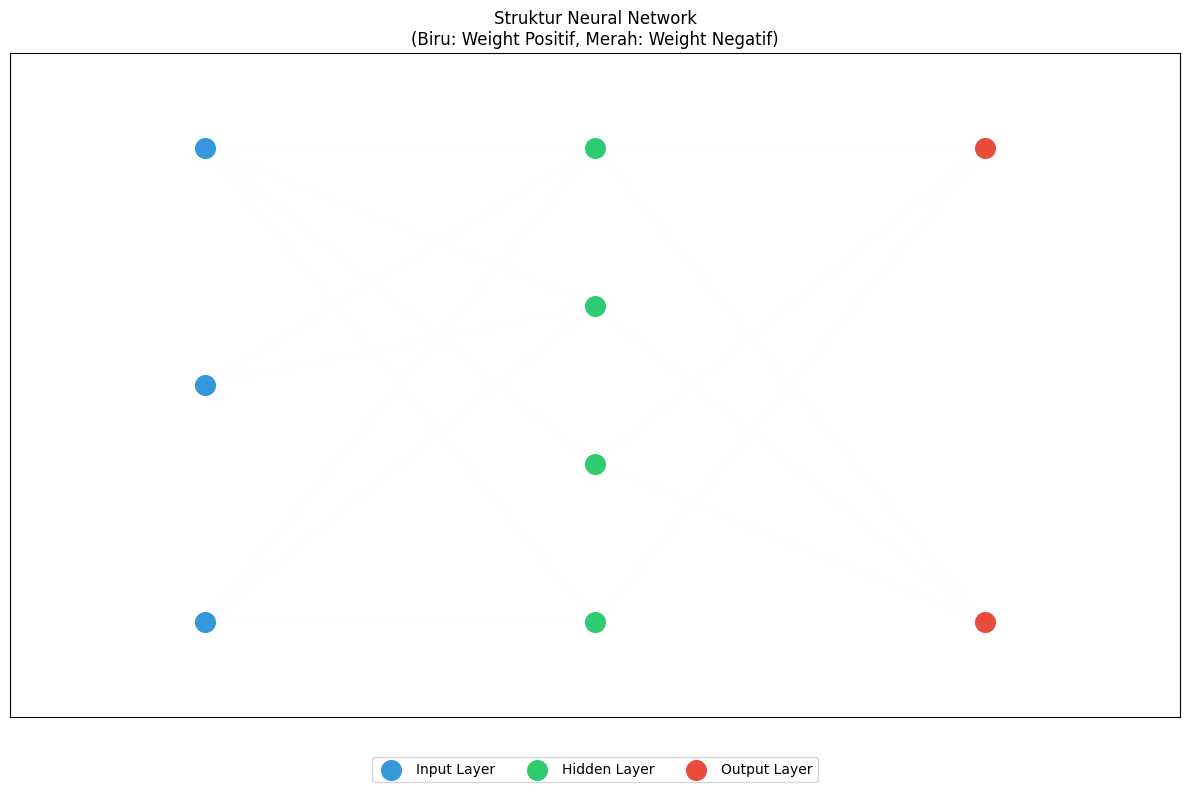


Input: [[0.5 0.2 0.1]]
Output: [[0.49573755 0.49552496]]


In [59]:
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        
        # Initialize weights and biases
        self.W1 = np.random.randn(input_size, hidden_size) * 0.01
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size) * 0.01
        self.b2 = np.zeros((1, output_size))
        
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def sigmoid_derivative(self, x):
        return x * (1 - x)
    
    def forward(self, X):
        # Hidden layer
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.sigmoid(self.z1)
        
        # Output layer
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = self.sigmoid(self.z2)
        
        return self.a2
    
    def visualize_network(self):
        fig, ax = plt.subplots(figsize=(12, 8))
        
        # Positions for each layer
        input_pos = np.array([[0, i/(self.input_size-1)] for i in range(self.input_size)])
        hidden_pos = np.array([[1, i/(self.hidden_size-1)] for i in range(self.hidden_size)])
        output_pos = np.array([[2, i/(self.output_size-1)] for i in range(self.output_size)])
        
        # Plot nodes
        ax.scatter(input_pos[:,0], input_pos[:,1], c='#3498db', s=200, label='Input Layer')
        ax.scatter(hidden_pos[:,0], hidden_pos[:,1], c='#2ecc71', s=200, label='Hidden Layer')
        ax.scatter(output_pos[:,0], output_pos[:,1], c='#e74c3c', s=200, label='Output Layer')
        
        # Plot connections with weight colors
        for i in range(self.input_size):
            for j in range(self.hidden_size):
                weight = self.W1[i,j]
                color = 'red' if weight < 0 else 'blue'
                alpha = min(abs(weight), 1)
                ax.plot([input_pos[i,0], hidden_pos[j,0]], 
                       [input_pos[i,1], hidden_pos[j,1]], 
                       color=color, alpha=alpha*0.5)
        
        for i in range(self.hidden_size):
            for j in range(self.output_size):
                weight = self.W2[i,j]
                color = 'red' if weight < 0 else 'blue'
                alpha = min(abs(weight), 1)
                ax.plot([hidden_pos[i,0], output_pos[j,0]], 
                       [hidden_pos[i,1], output_pos[j,1]], 
                       color=color, alpha=alpha*0.5)
        
        ax.set_xlim([-0.5, 2.5])
        ax.set_ylim([-0.2, 1.2])
        ax.set_xticks([])
        ax.set_yticks([])
        ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=3)
        plt.title('Struktur Neural Network\n(Biru: Weight Positif, Merah: Weight Negatif)')
        plt.tight_layout()
        plt.show()

# Create a simple network
nn = NeuralNetwork(input_size=3, hidden_size=4, output_size=2)
nn.visualize_network()

# Test forward pass
X = np.array([[0.5, 0.2, 0.1]])
output = nn.forward(X)
print("\nInput:", X)
print("Output:", output)

## 4. Backward Pass

Backward pass adalah proses menghitung gradien error dan mengupdate weights. Langkah-langkahnya:

1. Hitung error di output layer
2. Hitung gradien error terhadap weights output layer
3. Propagasi error ke hidden layer
4. Hitung gradien error terhadap weights hidden layer
5. Update semua weights dan biases

Mari kita implementasikan backward pass:

Initial network structure:


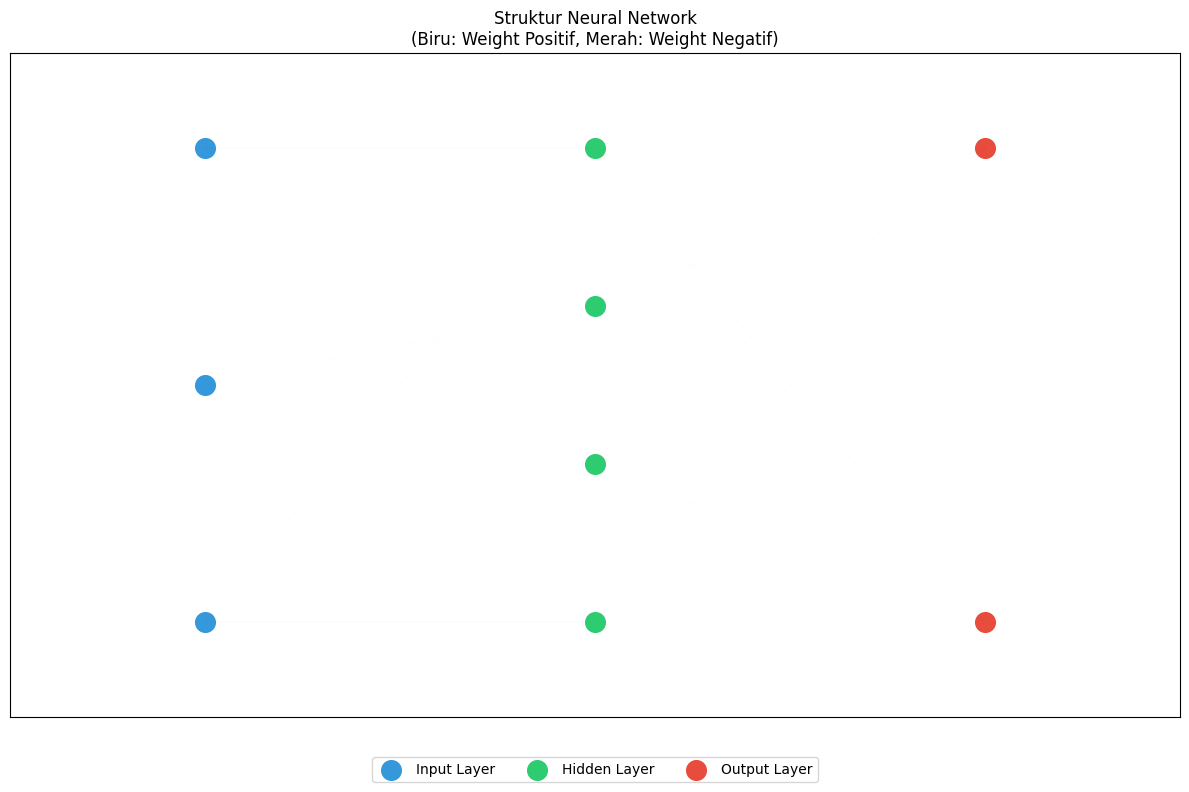

Epoch 0, Error: 0.2500
Epoch 100, Error: 0.2500
Epoch 200, Error: 0.2500
Epoch 300, Error: 0.2500
Epoch 400, Error: 0.2500
Epoch 500, Error: 0.2500
Epoch 600, Error: 0.2500
Epoch 700, Error: 0.2500
Epoch 800, Error: 0.2500
Epoch 900, Error: 0.2500

Final network structure:


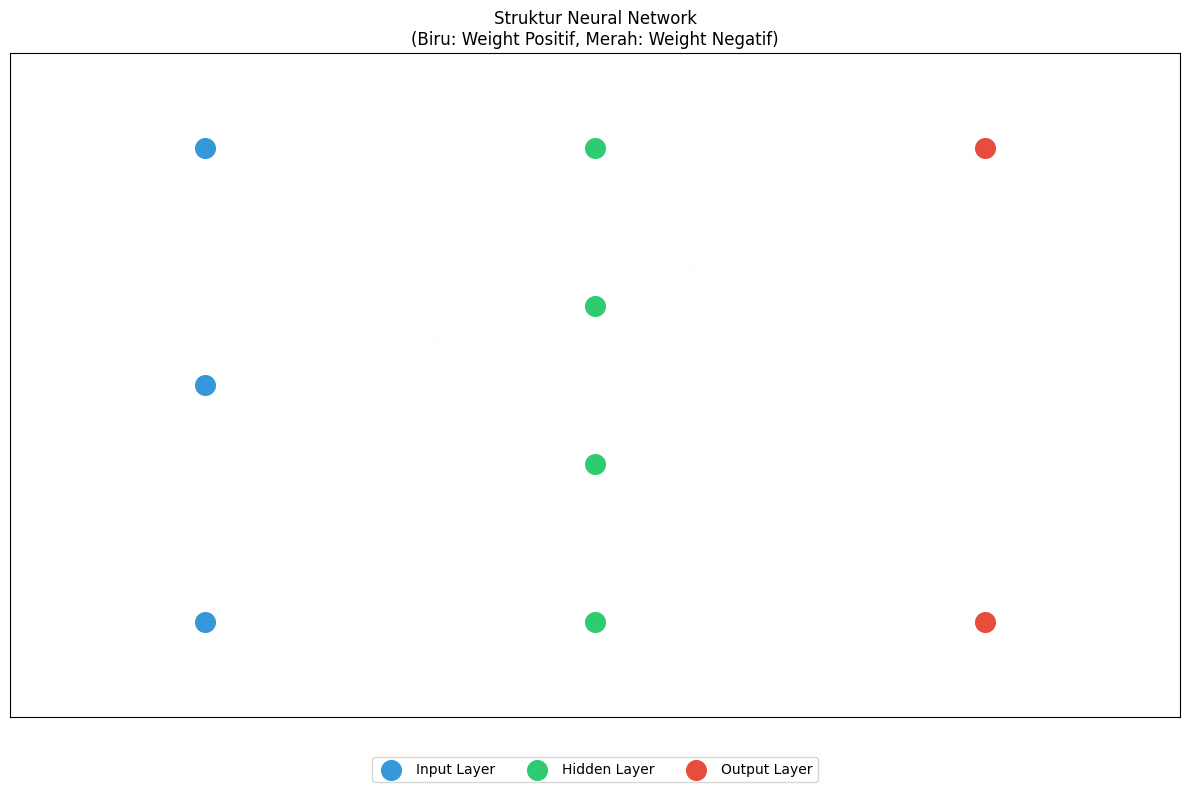

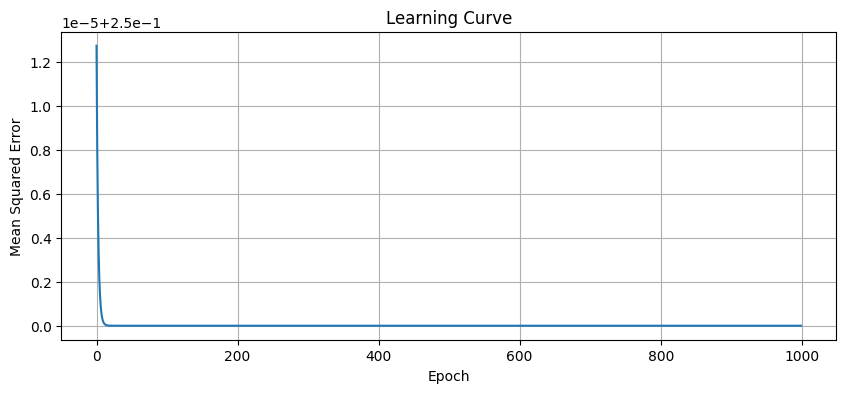


Predictions after training:
Input: [0 0 1] -> Target: [0 1] -> Predicted: [0.49999687 0.49999868]
Input: [0 1 1] -> Target: [1 0] -> Predicted: [0.49999254 0.50001225]
Input: [1 0 1] -> Target: [1 0] -> Predicted: [0.50000745 0.49998776]
Input: [1 1 1] -> Target: [0 1] -> Predicted: [0.50000312 0.50000133]


In [60]:
class NeuralNetworkWithBackprop(NeuralNetwork):
    def backward(self, X, y, learning_rate=0.1):
        m = X.shape[0]  # number of samples
        
        # Calculate gradients for output layer
        delta2 = self.a2 - y
        dW2 = np.dot(self.a1.T, delta2)
        db2 = np.sum(delta2, axis=0, keepdims=True)
        
        # Calculate gradients for hidden layer
        delta1 = np.dot(delta2, self.W2.T) * self.sigmoid_derivative(self.a1)
        dW1 = np.dot(X.T, delta1)
        db1 = np.sum(delta1, axis=0, keepdims=True)
        
        # Update weights and biases
        self.W2 -= learning_rate * dW2
        self.b2 -= learning_rate * db2
        self.W1 -= learning_rate * dW1
        self.b1 -= learning_rate * db1
        
        # Calculate error
        error = np.mean(np.square(y - self.a2))
        return error
    
    def train(self, X, y, epochs=1000, learning_rate=0.1):
        errors = []
        
        for i in range(epochs):
            # Forward pass
            self.forward(X)
            
            # Backward pass
            error = self.backward(X, y, learning_rate)
            errors.append(error)
            
            if i % 100 == 0:
                print(f"Epoch {i}, Error: {error:.4f}")
        
        return errors

# Create dataset for XOR problem
X = np.array([[0, 0, 1],
              [0, 1, 1],
              [1, 0, 1],
              [1, 1, 1]])

y = np.array([[0, 1],
              [1, 0],
              [1, 0],
              [0, 1]])

# Create and train network
nn = NeuralNetworkWithBackprop(input_size=3, hidden_size=4, output_size=2)
print("Initial network structure:")
nn.visualize_network()

# Train network
errors = nn.train(X, y, epochs=1000, learning_rate=0.1)

print("\nFinal network structure:")
nn.visualize_network()

# Plot learning curve
plt.figure(figsize=(10, 4))
plt.plot(errors)
plt.title('Learning Curve')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.grid(True)
plt.show()

# Test predictions
print("\nPredictions after training:")
predictions = nn.forward(X)
for i in range(len(X)):
    print(f"Input: {X[i]} -> Target: {y[i]} -> Predicted: {predictions[i]}")

## 5. Visualisasi Gradien Flow

Mari kita visualisasikan bagaimana gradien mengalir melalui network selama proses backpropagation. Ini akan membantu memahami konsep vanishing gradient dan exploding gradient.

Training with gradient visualization:


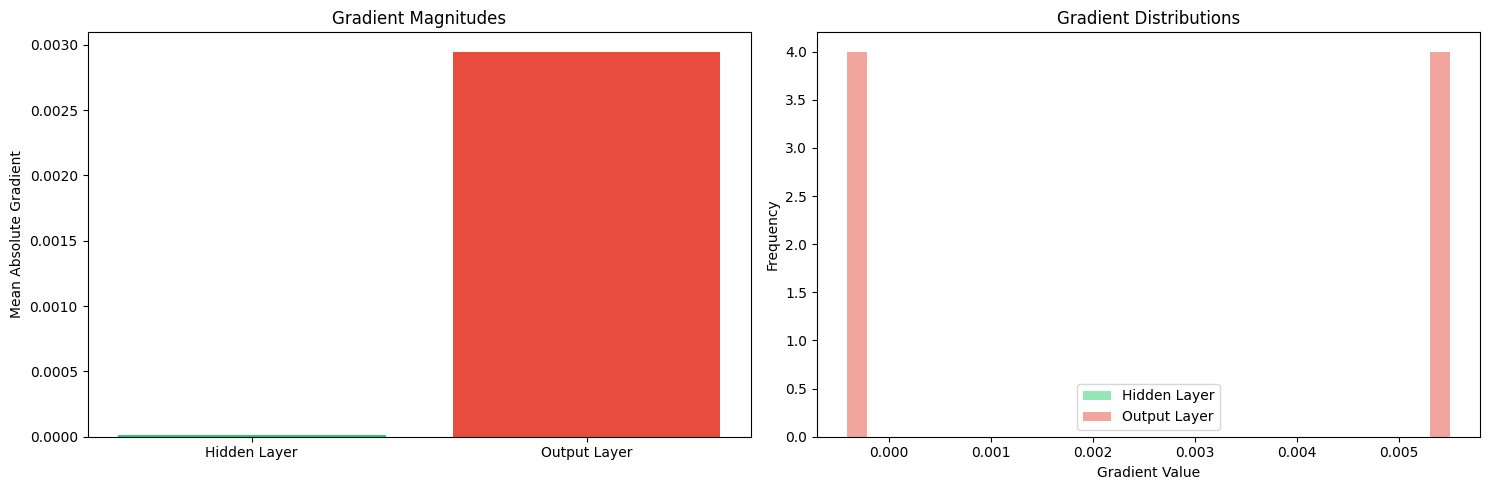

In [61]:
class GradientFlowVisualizer(NeuralNetworkWithBackprop):
    def backward_with_visualization(self, X, y, learning_rate=0.1):
        m = X.shape[0]
        
        # Calculate gradients
        delta2 = self.a2 - y
        dW2 = np.dot(self.a1.T, delta2)
        db2 = np.sum(delta2, axis=0, keepdims=True)
        
        delta1 = np.dot(delta2, self.W2.T) * self.sigmoid_derivative(self.a1)
        dW1 = np.dot(X.T, delta1)
        db1 = np.sum(delta1, axis=0, keepdims=True)
        
        # Visualize gradient flow
        plt.figure(figsize=(15, 5))
        
        # Plot gradient magnitudes for each layer
        plt.subplot(121)
        plt.title('Gradient Magnitudes')
        plt.bar(['Hidden Layer', 'Output Layer'], 
                [np.mean(np.abs(dW1)), np.mean(np.abs(dW2))],
                color=['#2ecc71', '#e74c3c'])
        plt.ylabel('Mean Absolute Gradient')
        
        # Plot gradient distributions
        plt.subplot(122)
        plt.title('Gradient Distributions')
        plt.hist(dW1.flatten(), bins=30, alpha=0.5, label='Hidden Layer', color='#2ecc71')
        plt.hist(dW2.flatten(), bins=30, alpha=0.5, label='Output Layer', color='#e74c3c')
        plt.xlabel('Gradient Value')
        plt.ylabel('Frequency')
        plt.legend()
        
        plt.tight_layout()
        plt.show()
        
        # Update weights and biases
        self.W2 -= learning_rate * dW2
        self.b2 -= learning_rate * db2
        self.W1 -= learning_rate * dW1
        self.b1 -= learning_rate * db1
        
        return np.mean(np.square(y - self.a2))

# Create and train network with gradient visualization
nn_vis = GradientFlowVisualizer(input_size=3, hidden_size=4, output_size=2)
print("Training with gradient visualization:")
_ = nn_vis.forward(X)
error = nn_vis.backward_with_visualization(X, y, learning_rate=0.1)

## 6. Latihan

1. **Eksperimen dengan Arsitektur Network**
   - Ubah jumlah neuron di hidden layer
   - Tambahkan hidden layer kedua
   - Amati pengaruhnya terhadap performa network

2. **Eksperimen dengan Hyperparameter**
   - Coba berbagai learning rate (0.01, 0.1, 1.0)
   - Ubah jumlah epochs
   - Visualisasikan pengaruh perubahan terhadap learning curve

3. **Implementasi Fungsi Aktivasi Lain**
   - Implementasikan ReLU: f(x) = max(0, x)
   - Implementasikan tanh: f(x) = tanh(x)
   - Bandingkan performa dengan sigmoid

4. **Problem Klasifikasi Lain**
   - Coba implementasikan untuk masalah AND gate
   - Coba implementasikan untuk masalah OR gate
   - Bandingkan tingkat kesulitan pembelajaran

## Kesimpulan

1. Backpropagation adalah algoritma fundamental dalam deep learning
2. Menggunakan chain rule untuk menghitung gradien
3. Terdiri dari forward pass dan backward pass
4. Dapat mengalami masalah vanishing/exploding gradient
5. Pemilihan hyperparameter sangat mempengaruhi performa

## Tips Implementasi

1. Inisialisasi weight dengan nilai kecil (random * 0.01)
2. Gunakan learning rate yang sesuai
3. Normalisasi input data
4. Monitor learning curve untuk mendeteksi masalah
5. Perhatikan gradien flow untuk optimasi

## Referensi

1. Rumelhart, D. E., Hinton, G. E., & Williams, R. J. (1986). Learning representations by back-propagating errors
2. LeCun, Y., Bottou, L., Orr, G. B., & Müller, K. R. (1998). Efficient BackProp
3. Nielsen, M. (2015). Neural Networks and Deep Learning